In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from IPython.display import Image

import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
from collections import OrderedDict

Text(0, 0.5, 'number of installs')

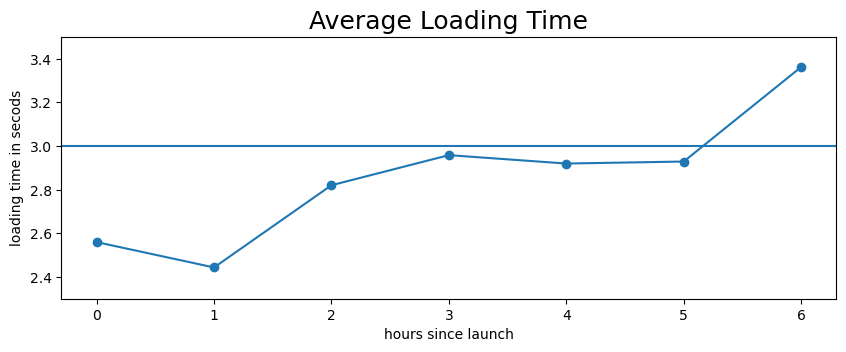

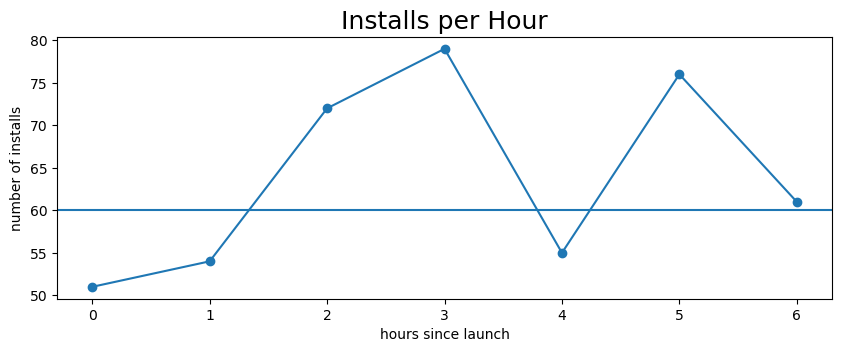

In [5]:
# First, we generate some fake data, that we are going to analyse later

observation_hours = 7  # your game was released 7 hours ago
expected_installs = 60 # expected number of installs per hour

loading_times = []
loading_times_averages = []
np.random.seed(12) # Seed needed to reproduce our particular scenario

for ix, installs in enumerate(np.random.poisson(lam=expected_installs, size=observation_hours)):
    # loop over hour
        # installs: Poisson(mu = 60) total installs this hour
            # for each install: loading_time ~ gamma(3, 0.95)
    loading_times.append( np.random.gamma(shape=3, scale=.95, size=installs) )
    loading_times_averages.append( loading_times[ix].mean() ) # average loading time for the hour


fig, ax = plt.subplots(figsize=(10,3.4))    
plot(loading_times_averages, marker='o')
title('Average Loading Time', fontdict={'size':18})
axhline(y=3)
xlabel('hours since launch')
ylabel('loading time in secods')
ylim(2.3,3.5)
# fig.savefig('01.01.png', dpi=200)

fig, ax = plt.subplots(figsize=(10,3.4))    
plot([len(x) for x in loading_times], marker='o')
title('Installs per Hour', fontdict={'size':18})
axhline(y=60)
xlabel('hours since launch')
ylabel('number of installs')


<Axes: xlabel='loading_times', ylabel='Density'>

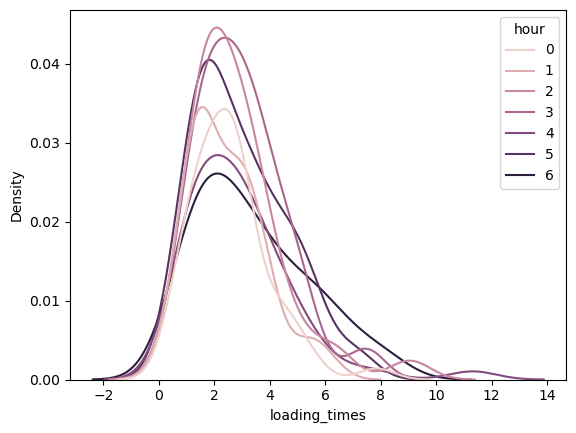

In [49]:
df = pd.DataFrame(columns=['loading_times'])
for hour, loading_times_of_the_hour in enumerate([np.squeeze(loading_times_hourly) for loading_times_hourly in loading_times]):
    df.loc[hour, 'loading_times'] = loading_times_of_the_hour
df = df.explode('loading_times').rename_axis('hour').reset_index()
df.head()

sns.kdeplot(df, x='loading_times', hue='hour',)

## Question:
### Is average loading time in last hour coming from the distribution of loading times with a mean of <= 3 seconds?

H0: population mean <= 3 for last hour's observations


H1: population mean > 3 for last hour's observations

<BarContainer object of 61 artists>

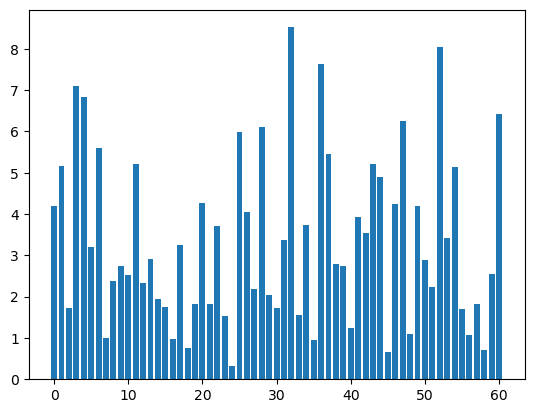

In [57]:
plt.bar(
    x=range(loading_times[6].shape[0]),
    height=np.squeeze(loading_times[6]),
)

In [60]:
def standard_error(sample):
    n = sample.shape[0]
    sd = sqrt(
        np.power((sample - sample.mean()), 2).sum() / (n - 1)
    )
    return sd/sqrt(n)

def one_sample_ttest(sample, popmean, one_sided=False):
    sample = np.asarray(sample)
    xbar = sample.mean()
    n = sample.shape[0]

    se = standard_error(sample)
    t = (xbar - popmean) / se
    p = 1 - stats.t.cdf(abs(t), n-1)
    p *= (2-one_sided)

    return t, p, se

one_sample_ttest(loading_times[6], popmean=3, one_sided=True)

(1.38005787853313, 0.08634481804336258, 0.26243688803019316)